<a href="https://colab.research.google.com/github/Nguenda/DataDecider/blob/main/GA_CapitalBikeshare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 

In [ ]:
'''
Assumptions
How many bikes to start with, eg 20 30 40 50 (try 2 scenarios when low or high or medium)
You can optimize to optimal docking
Collect weather
Collect time & date
Choose locations


'''

'\nAssumptions\nHow many bikes to start with, eg 20 30 40 50 (try 2 scenarios when low or high or medium)\nYou can optimize to optimal docking\nCollect weather\nCollect time & date\nChoose locations\n\n\n'

### Capital Bikeshare Data
https://ride.capitalbikeshare.com/system-data

We deal with data from Jan to Apr in 2022

In [ ]:
# read csv files
df_Jan=pd.read_csv('202201-capitalbikeshare-tripdata.csv')
df_Feb=pd.read_csv('202202-capitalbikeshare-tripdata.csv')
df_Mar=pd.read_csv('202203-capitalbikeshare-tripdata.csv')
df_Apr=pd.read_csv('202204-capitalbikeshare-tripdata.csv')


In [ ]:
df_Apr.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8F5ADBABCB4EBE01,classic_bike,2022-04-15 10:09:53,2022-04-15 10:16:12,Maine Ave & 9th St SW,31646.0,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,38.880440,-77.025236,38.888774,-77.028694,member
1,F502B0A7034DE321,classic_bike,2022-04-30 20:00:03,2022-05-01 14:27:41,Braddock Rd Metro North,31047.0,Braddock Rd Metro South,31969.0,38.814577,-77.052808,38.813474,-77.053734,casual
2,01BF0E3746A32678,classic_bike,2022-04-20 19:35:59,2022-04-20 19:41:04,11th & V st NW,31332.0,14th & Belmont St NW,31119.0,38.918199,-77.027171,38.921074,-77.031887,member
3,94BD7902E9889076,docked_bike,2022-04-15 17:23:21,2022-04-15 17:48:35,14th & D St NW / Ronald Reagan Building,31231.0,15th & W St NW,31125.0,38.894514,-77.031617,38.919019,-77.034449,casual
4,2CA1C29600E5F00A,classic_bike,2022-04-18 09:04:07,2022-04-18 09:05:12,11th & V st NW,31332.0,11th & V st NW,31332.0,38.918199,-77.027171,38.918199,-77.027171,member


In [ ]:
# concat data
df=pd.concat([df_Jan,df_Feb,df_Mar,df_Apr])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828621 entries, 0 to 310434
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             828621 non-null  object 
 1   rideable_type       828621 non-null  object 
 2   started_at          828621 non-null  object 
 3   ended_at            828621 non-null  object 
 4   start_station_name  792027 non-null  object 
 5   start_station_id    792027 non-null  float64
 6   end_station_name    786251 non-null  object 
 7   end_station_id      786251 non-null  float64
 8   start_lat           828621 non-null  float64
 9   start_lng           828621 non-null  float64
 10  end_lat             827170 non-null  float64
 11  end_lng             827170 non-null  float64
 12  member_casual       828621 non-null  object 
dtypes: float64(6), object(7)
memory usage: 88.5+ MB


In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.0,Potomac Ave & Main Line Blvd,31910.0,38.820932,-77.053096,38.822738,-77.049265,member
1,7F4A0E2F03EADEB7,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,31283.0,10th & G St NW,31274.0,38.903658,-77.031737,38.898243,-77.026235,member
2,30DD8A84164843AD,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,31283.0,12th & L St NW,31251.0,38.903658,-77.031737,38.903819,-77.028400,member
3,FC67665D7682D0A6,classic_bike,2022-01-27 20:09:25,2022-01-27 20:37:02,New York Ave & Hecht Ave NE,31518.0,Nannie Helen Burroughs & Minnesota Ave NE,31704.0,38.915604,-76.983683,38.901385,-76.941877,casual
4,7854F7CC4F631A1E,classic_bike,2022-01-07 16:14:28,2022-01-07 16:16:13,Falls Church City Hall / Park Ave & Little Fal...,32608.0,Pennsylvania Ave & Park Ave,32603.0,38.885434,-77.173605,38.887403,-77.176992,member


### Be careful when dealing with time and date

In [ ]:
# Transform time to date ONLY
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_date,ended_at_date
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.0,Potomac Ave & Main Line Blvd,31910.0,38.820932,-77.053096,38.822738,-77.049265,member,2022-01-06,2022-01-06
1,7F4A0E2F03EADEB7,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,31283.0,10th & G St NW,31274.0,38.903658,-77.031737,38.898243,-77.026235,member,2022-01-31,2022-01-31
2,30DD8A84164843AD,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,31283.0,12th & L St NW,31251.0,38.903658,-77.031737,38.903819,-77.028400,member,2022-01-07,2022-01-07
3,FC67665D7682D0A6,classic_bike,2022-01-27 20:09:25,2022-01-27 20:37:02,New York Ave & Hecht Ave NE,31518.0,Nannie Helen Burroughs & Minnesota Ave NE,31704.0,38.915604,-76.983683,38.901385,-76.941877,casual,2022-01-27,2022-01-27
4,7854F7CC4F631A1E,classic_bike,2022-01-07 16:14:28,2022-01-07 16:16:13,Falls Church City Hall / Park Ave & Little Fal...,32608.0,Pennsylvania Ave & Park Ave,32603.0,38.885434,-77.173605,38.887403,-77.176992,member,2022-01-07,2022-01-07


## For demonstration, we consider GWSB station "22nd & H St NW"
### Students will work with '21st & I St NW' and '21st St & Pennsylvania Ave NW' instead.

### Count daily pickups

In [ ]:
# Group and get pickup occurrence for 22nd & H St NW
df_sub1 = df[df['start_station_name']=="21st & I St NW"]
df_grp1 = df_sub1.groupby(['started_at_date','start_station_name']).size()
df_pu=df_grp1.reset_index(name = "pu_ct")
df_pu

,started_at_date,start_station_name,pu_ct
0,2022-01-01,21st & I St NW,7
1,2022-01-02,21st & I St NW,5
2,2022-01-04,21st & I St NW,2
3,2022-01-05,21st & I St NW,5
4,2022-01-06,21st & I St NW,10
...,...,...,...
113,2022-04-26,21st & I St NW,49
114,2022-04-27,21st & I St NW,67
115,2022-04-28,21st & I St NW,58
116,2022-04-29,21st & I St NW,69


In [ ]:
df_grp1

started_at_date  start_station_name
2022-01-01       22nd & H St NW         5
2022-01-02       22nd & H St NW        10
2022-01-05       22nd & H St NW         6
2022-01-06       22nd & H St NW         3
2022-01-07       22nd & H St NW         3
                                       ..
2022-04-26       22nd & H St NW        33
2022-04-27       22nd & H St NW        31
2022-04-28       22nd & H St NW        32
2022-04-29       22nd & H St NW        27
2022-04-30       22nd & H St NW        49
Length: 117, dtype: int64

### Count daily dropoffs

In [ ]:
# Group and get drop off occurrence for 22nd & H St NW
df_sub2 = df[df['end_station_name']=="21st & I St NW"]
df_grp2 = df_sub2.groupby(['ended_at_date','end_station_name']).size()
df_do=df_grp2.reset_index(name = "do_ct")
df_do

,ended_at_date,end_station_name,do_ct
0,2022-01-01,21st & I St NW,5
1,2022-01-02,21st & I St NW,5
2,2022-01-04,21st & I St NW,6
3,2022-01-05,21st & I St NW,5
4,2022-01-06,21st & I St NW,10
...,...,...,...
113,2022-04-26,21st & I St NW,67
114,2022-04-27,21st & I St NW,53
115,2022-04-28,21st & I St NW,57
116,2022-04-29,21st & I St NW,63


### Visualize pickups and dropoffs

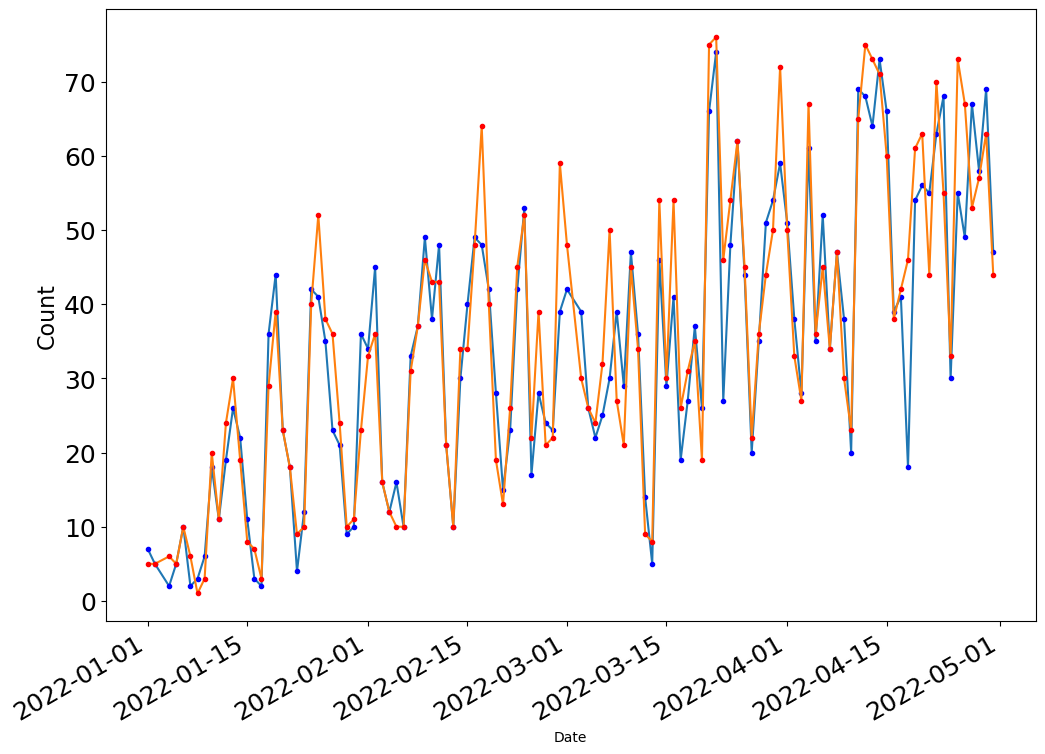

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 9))
ax1.plot_date( df_pu['started_at_date'], df_pu['pu_ct'],linestyle = 'solid',markeredgecolor = 'blue',markerfacecolor = 'blue', markersize = 3)
ax1.plot_date( df_do['ended_at_date'], df_do['do_ct'],linestyle = 'solid',markeredgecolor = 'red',markerfacecolor = 'red', markersize = 3)

ax1.set_xlabel('Date',fontsize=10)
ax1.set_ylabel('Count',fontsize=16)
plt.gcf().autofmt_xdate()

plt.tick_params(labelsize=18)
plt.show()  

## Weather Data

In [ ]:
df_weather = pd.read_csv('DC Weather 2022-01-01 to 2022-12-31.csv')

df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Washington,DC,USA",2022-01-01,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,...,0.6,0,NaN,2022-01-01T07:26:53,2022-01-01T16:56:53,0.99,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,A..."
1,"Washington,DC,USA",2022-01-02,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,...,1.7,1,NaN,2022-01-02T07:27:00,2022-01-02T16:57:43,1.00,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."
2,"Washington,DC,USA",2022-01-03,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,...,0.0,0,NaN,2022-01-03T07:27:05,2022-01-03T16:58:34,0.00,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,A..."
3,"Washington,DC,USA",2022-01-04,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,...,5.4,6,NaN,2022-01-04T07:27:07,2022-01-04T16:59:27,0.02,Clear,Clear conditions throughout the day.,snow,"KDCA,72405013743,72403793728,D6279,F0198,KADW,..."
4,"Washington,DC,USA",2022-01-05,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,...,2.2,1,NaN,2022-01-05T07:27:08,2022-01-05T17:00:21,0.05,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."


## Check missing values

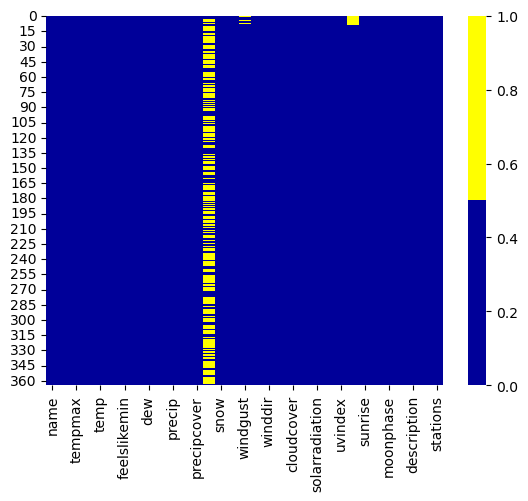

In [ ]:
# Date time format 
df_weather['datetime'] = pd.to_datetime(df_weather['datetime']).dt.date

# Use sns heatmap to see whats are the null values.
coln = df_weather.columns[:df_weather.shape[1]]  
colors = ['#000099','#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(df_weather[coln].isnull(), cmap = sns.color_palette(colors))
plt.show()

## Drop variables of your choice

In [ ]:
# Drop unnecessary variables
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

## Prepare X and y: Merge weather data with trip data

In [ ]:
# Merge with weather data and remove dates and station name

df_m_pu = df_pu.merge(df_weather, left_on='started_at_date', right_on='datetime') 
df_m_pu = df_m_pu.drop(columns=['started_at_date','start_station_name','datetime'])
df_m_do = df_do.merge(df_weather, left_on='ended_at_date', right_on='datetime') 
df_m_do = df_m_do.drop(columns=['ended_at_date','end_station_name','datetime'])

In [ ]:
df_m_pu.icon.unique()

array(['rain', 'partly-cloudy-day', 'snow', 'clear-day', 'wind'],
      dtype=object)

In [ ]:
df_m_pu.describe()

,pu_ct,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,...,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,33.966102,54.738983,37.410169,45.611017,52.688983,31.301695,41.855932,29.454237,55.945763,0.092534,...,0.267797,17.129661,205.262712,1019.207627,66.762712,9.350847,94.108475,7.710169,4.872881,0.500085
std,18.887853,13.812753,11.097858,12.116343,16.111586,14.467949,15.181576,13.653074,14.085876,0.223970,...,0.949483,5.313928,106.409726,8.100883,23.464273,1.106990,48.900542,4.127941,2.632949,0.305207
min,2.000000,26.800000,16.700000,23.500000,16.600000,4.300000,11.700000,2.800000,30.100000,0.000000,...,0.000000,6.500000,1.000000,993.400000,9.000000,5.700000,7.500000,0.600000,0.000000,0.000000
25%,19.250000,43.200000,28.600000,35.850000,38.775000,19.400000,29.250000,19.675000,44.200000,0.000000,...,0.000000,13.000000,151.850000,1014.025000,50.600000,9.625000,52.075000,4.025000,3.000000,0.252500
50%,35.000000,55.050000,36.650000,46.700000,55.050000,30.150000,43.400000,28.450000,53.400000,0.000000,...,0.000000,16.600000,200.000000,1019.200000,70.250000,9.900000,100.400000,8.150000,5.000000,0.500000
75%,47.750000,64.950000,46.800000,54.575000,64.950000,42.675000,53.850000,38.150000,63.600000,0.028000,...,0.000000,20.675000,305.275000,1024.175000,86.150000,9.900000,134.275000,11.025000,7.000000,0.745000
max,74.000000,85.800000,61.000000,72.900000,84.300000,61.000000,72.800000,56.000000,92.100000,1.038000,...,6.700000,32.500000,358.900000,1037.200000,99.900000,9.900000,197.800000,16.400000,10.000000,1.000000


In [ ]:
df_m_do.describe()

,do_ct,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,16.243697,54.868908,37.451261,45.674790,52.780672,31.353782,41.903361,29.635294,56.238655,0.099227,...,0.280672,17.169748,207.263025,1019.057143,67.080672,9.324370,93.702521,7.675630,4.840336,0.503025
std,10.086042,13.715238,11.028744,12.048941,16.062834,14.449044,15.158870,13.499439,14.144563,0.234666,...,0.955828,5.320978,106.354467,7.948495,23.168083,1.139504,49.558908,4.192183,2.664847,0.309115
min,1.000000,26.800000,16.700000,23.500000,16.600000,4.300000,11.700000,2.800000,30.100000,0.000000,...,0.000000,6.500000,1.000000,993.400000,9.000000,5.700000,6.300000,0.000000,0.000000,0.000000
25%,7.500000,43.900000,28.700000,35.900000,39.500000,19.500000,29.300000,20.300000,44.300000,0.000000,...,0.000000,13.100000,154.550000,1014.050000,53.650000,9.600000,49.550000,3.850000,3.000000,0.255000
50%,17.000000,55.100000,36.700000,46.800000,55.100000,30.200000,43.600000,28.500000,53.500000,0.000000,...,0.000000,16.600000,200.200000,1019.100000,70.700000,9.900000,100.000000,8.100000,5.000000,0.500000
75%,23.000000,64.900000,46.800000,54.550000,64.900000,42.650000,53.700000,38.100000,63.900000,0.033500,...,0.000000,20.900000,305.450000,1024.050000,86.100000,9.900000,135.050000,11.200000,7.000000,0.750000
max,39.000000,85.800000,61.000000,72.900000,84.300000,61.000000,72.800000,56.000000,92.100000,1.038000,...,6.700000,32.500000,358.900000,1037.200000,99.900000,9.900000,197.800000,16.400000,10.000000,1.000000


# Demo: train linear models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# pickup
y = df_m_pu['pu_ct']
X = df_m_pu.drop('pu_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tempmax                 118 non-null    float64
 1   tempmin                 118 non-null    float64
 2   temp                    118 non-null    float64
 3   feelslikemax            118 non-null    float64
 4   feelslikemin            118 non-null    float64
 5   feelslike               118 non-null    float64
 6   dew                     118 non-null    float64
 7   humidity                118 non-null    float64
 8   precip                  118 non-null    float64
 9   precipprob              118 non-null    int64  
 10  precipcover             118 non-null    float64
 11  snow                    118 non-null    float64
 12  snowdepth               118 non-null    float64
 13  windspeed               118 non-null    float64
 14  winddir                 118 non-null    fl

In [ ]:
# dropoff
df_m_do 
y = df_m_do['do_ct']
X = df_m_do.drop('do_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tempmax                 119 non-null    float64
 1   tempmin                 119 non-null    float64
 2   temp                    119 non-null    float64
 3   feelslikemax            119 non-null    float64
 4   feelslikemin            119 non-null    float64
 5   feelslike               119 non-null    float64
 6   dew                     119 non-null    float64
 7   humidity                119 non-null    float64
 8   precip                  119 non-null    float64
 9   precipprob              119 non-null    int64  
 10  precipcover             119 non-null    float64
 11  snow                    119 non-null    float64
 12  snowdepth               119 non-null    float64
 13  windspeed               119 non-null    float64
 14  winddir                 119 non-null    fl

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

## Linear Regression

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train) 
y_pred = linear_regressor.predict(X_test)

In [ ]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X_train.columns))

tempmax                   0.431837
tempmin                   0.448190
temp                     -1.871509
feelslikemax             -0.538638
feelslikemin             -0.896445
feelslike                 1.318472
dew                       2.196419
humidity                 -1.363480
precip                    4.108471
precipprob                0.015612
precipcover              -0.207099
snow                     -2.908279
snowdepth                 0.065122
windspeed                -1.213763
winddir                   0.032159
sealevelpressure          0.162454
cloudcover                0.101044
visibility               -0.653260
solarradiation           -0.249588
solarenergy               3.458863
uvindex                  -0.331106
moonphase                 4.358135
icon_partly-cloudy-day   -1.570322
icon_rain                -3.090264
icon_snow                 4.660585
icon_wind                 0.000000
dtype: float64


In [ ]:
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 213.572


In [ ]:
pu_pred_Hst = linear_regressor.predict((X_test.iloc[[0]]))
print(f"Predicted Pick up at H street is {pu_pred_Hst}")

Predicted Pick up at H street is [49.52190043]


## LASSO

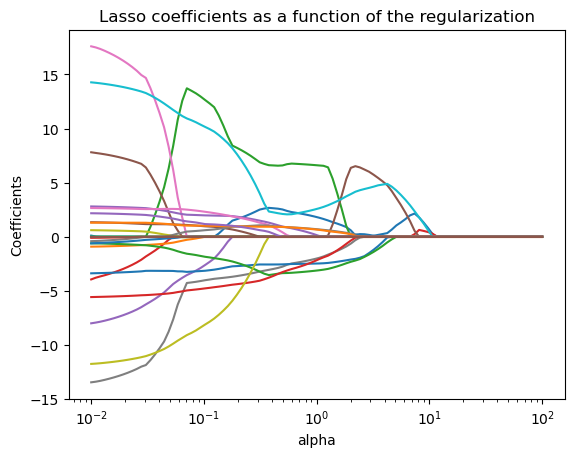

In [ ]:
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [ ]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.7924828983539177


In [ ]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   2.061753
tempmin                   0.000000
temp                      6.690140
feelslikemax              0.000000
feelslikemin              0.000000
feelslike                 0.000000
dew                       0.000000
humidity                 -2.245071
precip                   -0.000000
precipprob               -0.000000
precipcover              -2.495638
snow                      0.000000
snowdepth                -3.228062
windspeed                -2.590788
winddir                   0.481611
sealevelpressure          0.000000
cloudcover                0.000000
visibility                0.790024
solarradiation           -0.000000
solarenergy               2.318058
uvindex                   0.000000
moonphase                 0.765663
icon_partly-cloudy-day    0.000000
icon_rain                -0.000000
icon_snow                 0.000000
icon_wind                 0.000000
dtype: float64


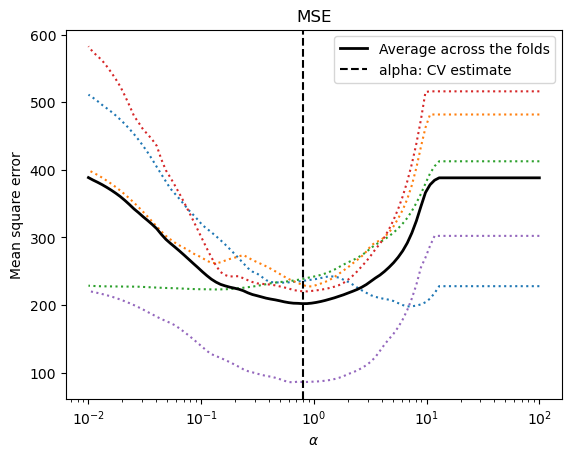

In [ ]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [ ]:
y_pred=lasso.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 143.928


In [ ]:
pu_pred_Hst = lasso.predict((X_test.iloc[[0]]))
print(f"Predicted Pick up at H street is {pu_pred_Hst}")

Predicted Pick up at H street is [528.92163258]


## Elastic Net


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train), y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.8441537223475757


In [ ]:
# with the best alpha
#lasso.set_params(alpha=lassocv.alpha_)
#lasso.fit(scale(X_train), y_train)


EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train), y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))


The coefficients are:
tempmax                   1.787805
tempmin                   0.732949
temp                      1.822107
feelslikemax              1.605643
feelslikemin              0.684583
feelslike                 1.779751
dew                       0.070541
humidity                 -1.589035
precip                   -0.578261
precipprob               -0.506038
precipcover              -1.276274
snow                     -0.000000
snowdepth                -2.460448
windspeed                -1.725519
winddir                   0.483840
sealevelpressure          0.000000
cloudcover                0.000000
visibility                1.080337
solarradiation            0.000000
solarenergy               1.708672
uvindex                   1.202641
moonphase                 1.064203
icon_partly-cloudy-day    0.085965
icon_rain                -0.000000
icon_snow                -0.000000
icon_wind                 0.000000
dtype: float64


In [ ]:
y_pred=EN.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 144.573


## Ridge Regression

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Drop off at H street

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [ ]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   0.333491
tempmin                   0.270577
temp                      0.322168
feelslikemax              0.326925
feelslikemin              0.277822
feelslike                 0.315758
dew                       0.192886
humidity                 -0.155979
precip                   -0.214452
precipprob               -0.083650
precipcover              -0.223666
snow                     -0.226865
snowdepth                -0.282290
windspeed                -0.073365
winddir                  -0.053488
sealevelpressure          0.057314
cloudcover               -0.059860
visibility                0.175012
solarradiation            0.207181
solarenergy               0.308503
uvindex                   0.287517
moonphase                 0.177067
icon_partly-cloudy-day    0.137140
icon_rain                 0.021477
icon_snow                -0.221862
icon_wind                 0.000000
dtype: float64


In [ ]:
y_pred=ridge.predict(scaler.transform(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is before alpha tuning {mse}")

MSE is 96.323


In [ ]:

# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 68.92612104349702


In [ ]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   0.883425
tempmin                   0.621735
temp                      0.871056
feelslikemax              0.761444
feelslikemin              0.550338
feelslike                 0.720989
dew                       0.533658
humidity                 -0.518601
precip                   -0.723975
precipprob                0.211473
precipcover              -0.853020
snow                     -0.568167
snowdepth                -1.257364
windspeed                -0.531050
winddir                  -0.537987
sealevelpressure          0.544221
cloudcover                0.234375
visibility                0.639723
solarradiation            0.201029
solarenergy               1.018651
uvindex                   0.944634
moonphase                 0.934280
icon_partly-cloudy-day   -0.054359
icon_rain                 0.345223
icon_snow                -0.362873
icon_wind                 0.000000
dtype: float64


In [ ]:
y_pred=ridge.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is after alpha tuning {mse}")

MSE is 76.529


In [ ]:
do_pred_Hst = ridge.predict(scale(X_test.iloc[[0]]))
print(f"Predicted drop off at H street is {do_pred_Hst}")

Predicted drop off at H street is [23.06944444]


In [ ]:
y_pred=ridge.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 76.529


### Pick up at Hstreet


<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tempmax                 120 non-null    float64
 1   tempmin                 120 non-null    float64
 2   temp                    120 non-null    float64
 3   feelslikemax            120 non-null    float64
 4   feelslikemin            120 non-null    float64
 5   feelslike               120 non-null    float64
 6   dew                     120 non-null    float64
 7   humidity                120 non-null    float64
 8   precip                  120 non-null    float64
 9   precipprob              120 non-null    int64  
 10  precipcover             120 non-null    float64
 11  snow                    120 non-null    float64
 12  snowdepth               120 non-null    float64
 13  windspeed               120 non-null    float64
 14  winddir                 120 non-null    fl

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

In [ ]:
print('----------------------------------')
print('PICK UP FROM 21st & I St NW RESULTS')
print('----------------------------------')
y = df_m_pu['pu_ct']
X = df_m_pu.drop('pu_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.info()

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))
print('----------------------------------')

y_pred=ridge.predict(scaler.transform(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is before alpha tuning {mse}")
print('----------------------------------')

# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)
print('----------------------------------')

# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))
print('----------------------------------')

y_pred=ridge.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is after alpha tuning {mse}")
print('----------------------------------')

pu_pred_Hst = ridge.predict(scale(X_test.iloc[[0]]))
print(f"Predicted Pick up at H street is {pu_pred_Hst}")
print('----------------------------------')

----------------------------------
PICK UP FROM 21st & I St NW RESULTS
----------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tempmax                 118 non-null    float64
 1   tempmin                 118 non-null    float64
 2   temp                    118 non-null    float64
 3   feelslikemax            118 non-null    float64
 4   feelslikemin            118 non-null    float64
 5   feelslike               118 non-null    float64
 6   dew                     118 non-null    float64
 7   humidity                118 non-null    float64
 8   precip                  118 non-null    float64
 9   precipprob              118 non-null    int64  
 10  precipcover             118 non-null    float64
 11  snow                    118 non-null    float64
 12  snowdepth               118 non-null    fl

In [ ]:
print('----------------------------------')
print('DROPP OFF FROM H STREET RESULTS')
print('----------------------------------')
# dropoff
df_m_do 
y = df_m_do['do_ct']
X = df_m_do.drop('do_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.info()

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))
print('----------------------------------')

y_pred=ridge.predict(scaler.transform(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is before alpha tuning {mse}")
print('----------------------------------')

# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)
print('----------------------------------')

# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))
print('----------------------------------')

y_pred=ridge.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is after alpha tuning {mse}")
print('----------------------------------')

pu_pred_Hst = ridge.predict(scale(X_test.iloc[[0]]))
print(f"Predicted Drop off at I street is {pu_pred_Hst}")
print('----------------------------------')

----------------------------------
DROPP OFF FROM H STREET RESULTS
----------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tempmax                 119 non-null    float64
 1   tempmin                 119 non-null    float64
 2   temp                    119 non-null    float64
 3   feelslikemax            119 non-null    float64
 4   feelslikemin            119 non-null    float64
 5   feelslike               119 non-null    float64
 6   dew                     119 non-null    float64
 7   humidity                119 non-null    float64
 8   precip                  119 non-null    float64
 9   precipprob              119 non-null    int64  
 10  precipcover             119 non-null    float64
 11  snow                    119 non-null    float64
 12  snowdepth               119 non-null    float6

In [ ]:
# Group and get pickup occurrence for 22nd & H St NW
df_sub1 = df[df['start_station_name']=="21st St & Pennsylvania Ave NW"]
df_grp1 = df_sub1.groupby(['started_at_date','start_station_name']).size()
df_pu=df_grp1.reset_index(name = "pu_ct")
df_pu

# Group and get drop off occurrence for 22nd & H St NW
df_sub2 = df[df['end_station_name']=="21st St & Pennsylvania Ave NW"]
df_grp2 = df_sub2.groupby(['ended_at_date','end_station_name']).size()
df_do=df_grp2.reset_index(name = "do_ct")
df_do

# Merge with weather data and remove dates and station name
# Weather was data mined above

df_m_pu = df_pu.merge(df_weather, left_on='started_at_date', right_on='datetime') 
df_m_pu = df_m_pu.drop(columns=['started_at_date','start_station_name','datetime'])
df_m_do = df_do.merge(df_weather, left_on='ended_at_date', right_on='datetime') 
df_m_do = df_m_do.drop(columns=['ended_at_date','end_station_name','datetime'])
df_pu.head()


,started_at_date,start_station_name,pu_ct
0,2022-01-01,21st St & Pennsylvania Ave NW,5
1,2022-01-02,21st St & Pennsylvania Ave NW,1
2,2022-01-03,21st St & Pennsylvania Ave NW,1
3,2022-01-05,21st St & Pennsylvania Ave NW,3
4,2022-01-06,21st St & Pennsylvania Ave NW,5


In [ ]:
df_do.head()

,ended_at_date,end_station_name,do_ct
0,2022-01-01,21st St & Pennsylvania Ave NW,4
1,2022-01-02,21st St & Pennsylvania Ave NW,3
2,2022-01-03,21st St & Pennsylvania Ave NW,2
3,2022-01-04,21st St & Pennsylvania Ave NW,1
4,2022-01-05,21st St & Pennsylvania Ave NW,4


In [ ]:
print('----------------------------------')
print('DROPP OFF FROM 21st St & Pennsylvania Ave NW RESULTS')
print('----------------------------------')
# dropoff
df_m_do 
y = df_m_do['do_ct']
X = df_m_do.drop('do_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.info()

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))
print('----------------------------------')

y_pred=ridge.predict(scaler.transform(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is before alpha tuning {mse}")
print('----------------------------------')

# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=10)
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)
print('----------------------------------')

# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))
print('----------------------------------')

y_pred=ridge.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is after alpha tuning {mse}")
print('----------------------------------')

do_pred_penn = ridge.predict(scale(X_test.iloc[[0]]))
print(f"Predicted Drop off at Penn Ave is {do_pred_penn}")
print('----------------------------------')



----------------------------------
DROPP OFF FROM 21st St & Pennsylvania Ave NW RESULTS
----------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tempmax                 119 non-null    float64
 1   tempmin                 119 non-null    float64
 2   temp                    119 non-null    float64
 3   feelslikemax            119 non-null    float64
 4   feelslikemin            119 non-null    float64
 5   feelslike               119 non-null    float64
 6   dew                     119 non-null    float64
 7   humidity                119 non-null    float64
 8   precip                  119 non-null    float64
 9   precipprob              119 non-null    int64  
 10  precipcover             119 non-null    float64
 11  snow                    119 non-null    float64
 12  snowdepth               1

,do_ct,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,16.243697,54.868908,37.451261,45.674790,52.780672,31.353782,41.903361,29.635294,56.238655,0.099227,...,0.280672,17.169748,207.263025,1019.057143,67.080672,9.324370,93.702521,7.675630,4.840336,0.503025
std,10.086042,13.715238,11.028744,12.048941,16.062834,14.449044,15.158870,13.499439,14.144563,0.234666,...,0.955828,5.320978,106.354467,7.948495,23.168083,1.139504,49.558908,4.192183,2.664847,0.309115
min,1.000000,26.800000,16.700000,23.500000,16.600000,4.300000,11.700000,2.800000,30.100000,0.000000,...,0.000000,6.500000,1.000000,993.400000,9.000000,5.700000,6.300000,0.000000,0.000000,0.000000
25%,7.500000,43.900000,28.700000,35.900000,39.500000,19.500000,29.300000,20.300000,44.300000,0.000000,...,0.000000,13.100000,154.550000,1014.050000,53.650000,9.600000,49.550000,3.850000,3.000000,0.255000
50%,17.000000,55.100000,36.700000,46.800000,55.100000,30.200000,43.600000,28.500000,53.500000,0.000000,...,0.000000,16.600000,200.200000,1019.100000,70.700000,9.900000,100.000000,8.100000,5.000000,0.500000
75%,23.000000,64.900000,46.800000,54.550000,64.900000,42.650000,53.700000,38.100000,63.900000,0.033500,...,0.000000,20.900000,305.450000,1024.050000,86.100000,9.900000,135.050000,11.200000,7.000000,0.750000
max,39.000000,85.800000,61.000000,72.900000,84.300000,61.000000,72.800000,56.000000,92.100000,1.038000,...,6.700000,32.500000,358.900000,1037.200000,99.900000,9.900000,197.800000,16.400000,10.000000,1.000000


In [ ]:
print('----------------------------------')
print('PICK UP FROM 21st St & Pennsylvania Ave NW RESULTS')
print('----------------------------------')
# dropoff
y = df_m_pu['pu_ct']
X = df_m_pu.drop('pu_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.info()

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))
print('----------------------------------')

y_pred=ridge.predict(scaler.transform(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is before alpha tuning {mse}")
print('----------------------------------')

# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)
print('----------------------------------')

# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scaler.transform(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))
print('----------------------------------')

y_pred=ridge.predict(scaler.transform(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is after alpha tuning {mse}")
print('----------------------------------')

do_pred_penn = ridge.predict(scaler.transform(X_test.iloc[[0]]))
print(f"Predicted Pick up at Penn Ave is {do_pred_penn}")
print('----------------------------------')

----------------------------------
PICK UP FROM 21st St & Pennsylvania Ave NW RESULTS
----------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tempmax                 115 non-null    float64
 1   tempmin                 115 non-null    float64
 2   temp                    115 non-null    float64
 3   feelslikemax            115 non-null    float64
 4   feelslikemin            115 non-null    float64
 5   feelslike               115 non-null    float64
 6   dew                     115 non-null    float64
 7   humidity                115 non-null    float64
 8   precip                  115 non-null    float64
 9   precipprob              115 non-null    int64  
 10  precipcover             115 non-null    float64
 11  snow                    115 non-null    float64
 12  snowdepth               115

In [ ]:
print('----------------------------------')
print('PICK UP FROM 21st St & Pennsylvania Ave NW RESULTS')
print('----------------------------------')
# dropoff
y = df_m_pu['pu_ct']
X = df_m_pu.drop('pu_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.info()

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)


# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)



print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))
print('----------------------------------')

y_pred=ridge.predict(scaler.transform(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is before alpha tuning {mse}")
print('----------------------------------')

# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)
print('----------------------------------')

# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))
print('----------------------------------')

y_pred=ridge.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is after alpha tuning {mse}")
print('----------------------------------')

do_pred_penn = ridge.predict(scale(X_test.iloc[[0]]))
print(f"Predicted Pick up at Penn Ave is {do_pred_penn}")
print('----------------------------------')

In [ ]:
print('----------------------------------')
print('PICK UP FROM 21st St & Pennsylvania Ave NW RESULTS')
print('----------------------------------')
# dropoff
y = df_m_pu['pu_ct']
X = df_m_pu.drop('pu_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.info()

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))
print('----------------------------------')

y_pred=ridge.predict(scaler.transform(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is before alpha tuning {mse}")
print('----------------------------------')

# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, cv=10, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)
print('----------------------------------')

# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))
print('----------------------------------')

y_pred=ridge.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is after alpha tuning {mse}")
print('----------------------------------')

do_pred_penn = ridge.predict(scale(X_test.iloc[[0]]))
print(f"Predicted Pick up at Penn Ave is {do_pred_penn}")
print('----------------------------------')

----------------------------------
PICK UP FROM 21st St & Pennsylvania Ave NW RESULTS
----------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tempmax                 115 non-null    float64
 1   tempmin                 115 non-null    float64
 2   temp                    115 non-null    float64
 3   feelslikemax            115 non-null    float64
 4   feelslikemin            115 non-null    float64
 5   feelslike               115 non-null    float64
 6   dew                     115 non-null    float64
 7   humidity                115 non-null    float64
 8   precip                  115 non-null    float64
 9   precipprob              115 non-null    int64  
 10  precipcover             115 non-null    float64
 11  snow                    115 non-null    float64
 12  snowdepth               115